# Import all the libraries

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Import block A and set column 'a1' i.e. firm id as index
blkA = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkA201718.dta').set_index('a1')
blkA.head(5)

,yr,blk,a2,a3,a4,a5,a7,a8,a9,a10,...,a12,bonus,pf,welfare,mwdays,nwdays,wdays,costop,expshare,mult
a1,,,,,,,,,,,,,,,,,,,,,
100001,18,A,99999,1,9999,12002,01,99,2,9999,...,2,0.0,0.0,0,0,230,230,1.342280e+05,0,1.0
100002,18,A,99999,1,9999,12007,01,99,2,9999,...,1,0.0,0.0,0,305,0,305,1.699809e+07,0,1.0
100003,18,A,99999,1,9999,35101,01,99,1,9999,...,1,3435006.0,52010887.0,11125619,305,0,305,1.069046e+09,0,1.0
100004,18,A,99999,1,9999,35101,01,99,1,9999,...,1,0.0,191643973.0,17443314,0,311,311,2.090477e+09,0,1.0
100005,18,A,99999,1,9999,35101,01,99,1,9999,...,1,0.0,17252616.0,7365503,313,0,313,1.050969e+09,0,1.0


In [3]:
# select relevant columns
outA = blkA[['bonus','pf','welfare','a7','a5','a9']]
outA.head(5)

,bonus,pf,welfare,a7,a5,a9
a1,,,,,,
100001,0.0,0.0,0,01,12002,2
100002,0.0,0.0,0,01,12007,2
100003,3435006.0,52010887.0,11125619,01,35101,1
100004,0.0,191643973.0,17443314,01,35101,1
100005,0.0,17252616.0,7365503,01,35101,1


In [4]:
# import block B and set 'ab01' as index
blkB = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkB201718.dta').set_index('ab01')
blkB.head(5)

,yr,blk,b02,b03,b04,b05,b06f,b06t,b07,b08,b09
ab01,,,,,,,,,,,
100001,18,B,7,999999999999999999999,2,1992,4,3,0,2,3
100002,18,B,1,999999999999999999999,2,2017,4,3,12,2,3
100003,18,B,4,999999999999999999999,1,2010,4,3,12,2,3
100004,18,B,4,999999999999999999999,1,1997,4,3,12,2,3
100005,18,B,4,999999999999999999999,2,2015,4,3,12,2,3


In [5]:
# import block C and set 'ac01' as index
blkC = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkC201718.dta').set_index('ac01')

blkC.head(5)

,yr,blk,c_11,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_110,c_111,c_112,c_113
ac01,,,,,,,,,,,,,,
100001,18,C,1,285500.0,0.0,0.0,0.0,285500.0,0.0,0.0,0.0,0.0,285500.0,285500.0
100001,18,C,2,1968320.0,0.0,0.0,0.0,1968320.0,1577266.0,24192.0,0.0,1601458.0,391054.0,366862.0
100001,18,C,3,2883103.0,0.0,0.0,0.0,2883103.0,2173482.0,0.0,0.0,2173482.0,709621.0,709621.0
100001,18,C,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100001,18,C,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# subset block C by filtering out only rows corresponding to total fixed assets
temp = blkC[blkC['c_11']==10]

depC = temp[['c_19','c_17','c_112','c_113']]
depC['nvaK'] = (depC['c_112'] + depC['c_113'])/2

depC.head(5)

,c_19,c_17,c_112,c_113,nvaK
ac01,,,,,
100001,24192.0,5.467485e+06,1.457032e+06,1.432840e+06,1.444936e+06
100002,4034761.0,0.000000e+00,2.199583e+07,1.991278e+07,2.095430e+07
100003,565427062.0,1.106421e+10,7.290431e+09,6.733088e+09,7.011759e+09
100004,886146484.0,3.535026e+10,1.677573e+10,1.593169e+10,1.635371e+10
100005,496909762.0,9.878594e+09,8.529430e+09,8.191335e+09,8.360383e+09


In [7]:
# import block D and set 'ad01' as index
blkD = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkD201718.dta').set_index('ad01')
blkD.head(5)

,yr,blk,d11,d13,d14
ad01,,,,,
100001,18,D,1,93000.0,93000.0
100001,18,D,2,0.0,0.0
100001,18,D,3,0.0,0.0
100001,18,D,5,0.0,0.0
100001,18,D,6,0.0,0.0


In [8]:
# filter the rows corresponding to finished goods and select only the opening and closing value columns
temp = blkD[blkD['d11']==6]

outD = temp[['d13','d14']]
outD.head(5)

,d13,d14
ad01,,
100001,0.0,0.0
100002,0.0,1914463.0
100003,0.0,0.0
100004,0.0,0.0
100005,0.0,0.0


In [9]:
# import block E
blkE = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkE201718.dta').set_index('AE01')
blkE.index = (blkE.index).astype(str)
blkE.head(5)

,yr,blk,E11,E13,E14,E15,E16,E17,E18
AE01,,,,,,,,,
100001,18,E,1,0,0,0,0,0,0.0
100001,18,E,2,0,0,0,0,0,0.0
100001,18,E,4,0,0,0,0,0,0.0
100001,18,E,6,0,0,0,0,0,0.0
100001,18,E,7,0,230,230,1,230,84000.0


In [10]:
# Select the row corresponding to total number of employees
temp = blkE[blkE['E11']==9]


outE = temp[['E16','E17','E18']]
outE.head(5)

,E16,E17,E18
AE01,,,
100001,1,230,84000.0
100002,8,2417,560279.0
100003,617,225205,477165307.0
100004,212,77623,215640000.0
100005,129,47443,124632322.0


In [11]:
# import block F
blkF = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkF201718.dta').set_index('AF01')

blkF.head(5)


,yr,blk,F1,F2A,F2B,F3,F4,F5,F6,F7,F8,F9,F10,F11
AF01,,,,,,,,,,,,,,
100001,18,F,0.0,0,0.0,50228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,18,F,0.0,0,0.0,165146.0,0.0,0.0,0.0,0.0,0.0,21090.0,3347626.0,0.0
100003,18,F,0.0,11027920,48927679.0,185377656.0,0.0,32799110.0,0.0,0.0,6441695.0,0.0,121398596.0,0.0
100004,18,F,0.0,14772087,43337965.0,380166086.0,0.0,158964012.0,14160430.0,0.0,857481.0,0.0,365670.0,0.0
100005,18,F,0.0,5501781,53929582.0,198064716.0,127312017.0,27676424.0,12104746.0,0.0,0.0,0.0,331238989.0,0.0


In [12]:
# Subset the dataframe blkF consisting of relevant columns
inpF = blkF[['F1','F2A','F2B','F3','F4','F5','F6','F7']]
inpF.head(5)

,F1,F2A,F2B,F3,F4,F5,F6,F7
AF01,,,,,,,,
100001,0.0,0,0.0,50228.0,0.0,0.0,0.0,0.0
100002,0.0,0,0.0,165146.0,0.0,0.0,0.0,0.0
100003,0.0,11027920,48927679.0,185377656.0,0.0,32799110.0,0.0,0.0
100004,0.0,14772087,43337965.0,380166086.0,0.0,158964012.0,14160430.0,0.0
100005,0.0,5501781,53929582.0,198064716.0,127312017.0,27676424.0,12104746.0,0.0


In [13]:
outF = blkF[['F8','F9','F10']]
outF.head(5)

,F8,F9,F10
AF01,,,
100001,0.0,0.0,0.0
100002,0.0,21090.0,3347626.0
100003,6441695.0,0.0,121398596.0
100004,857481.0,0.0,365670.0
100005,0.0,0.0,331238989.0


In [14]:
# import block G
blkG = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkG201718.dta').set_index('AG01')
blkG.head(5)

,yr,blk,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
AG01,,,,,,,,,,,,,,
100003,18,G,0.0,1.249964e+08,0.0,0.0,0.0,0,0.0,0.0,0,98105.0,0.0,0.0
100005,18,G,0.0,1.444756e+09,0.0,127312017.0,0.0,0,0.0,0.0,0,851556539.0,0.0,24234159.0
100006,18,G,0.0,8.348514e+08,0.0,185045255.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
100009,18,G,0.0,5.693000e+03,0.0,0.0,0.0,0,0.0,0.0,0,8309.0,0.0,0.0
100010,18,G,0.0,4.278050e+06,0.0,0.0,-6799636.0,0,0.0,0.0,0,0.0,14272582.0,0.0


In [15]:
# select relevant columns from Block G
outG = blkG[['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10']]
outG.head(5)

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
AG01,,,,,,,,,,
100003,0.0,1.249964e+08,0.0,0.0,0.0,0,0.0,0.0,0,98105.0
100005,0.0,1.444756e+09,0.0,127312017.0,0.0,0,0.0,0.0,0,851556539.0
100006,0.0,8.348514e+08,0.0,185045255.0,0.0,0,0.0,0.0,0,0.0
100009,0.0,5.693000e+03,0.0,0.0,0.0,0,0.0,0.0,0,8309.0
100010,0.0,4.278050e+06,0.0,0.0,-6799636.0,0,0.0,0.0,0,0.0


In [16]:
# import block H
blkH = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkH201718.dta').set_index('AH01')
blkH.head(5)

,yr,blk,H11,H13,H14,H15,H16,H17
AH01,,,,,,,,
100002,18,H,1,0325001,27,160.0,9897055.0,61856.59
100002,18,H,14,9990800,0,0.0,1773618.0,0.00
100002,18,H,15,9990400,28,2574.0,0.0,0.00
100002,18,H,16,9990500,28,204032.0,805928.0,3.95
100002,18,H,17,9990600,0,0.0,32000.0,0.00


In [17]:
# Select the row corresponding to total inputs
temp = blkH[blkH['H11']==23]
inpH = temp[['H16']]
inpH.head(5)

,H16
AH01,
100002,1.290395e+07
100003,1.193365e+08
100004,1.053126e+09
100005,1.458907e+08
100006,0.000000e+00


In [18]:
# Import block J
blkJ = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkJ201718.dta').set_index('J01')

blkJ.head(5)

,yr,blk,J11,J13,J14,J15,J16,J17,J18,J19,J110,J111,J112,J113
J01,,,,,,,,,,,,,,
100002,18,J,1,0325003,27,157.97,145.00,2.140316e+07,0.0,0.0,0.0,0.0,147608.00,2.331764e+07
100002,18,J,12,9995000,0,0.00,0.00,2.140316e+07,0.0,0.0,0.0,0.0,0.00,2.331764e+07
100003,18,J,1,1710003,13,428000.00,428000.00,2.211052e+09,0.0,0.0,6570805.0,0.0,5150.66,2.204481e+09
100003,18,J,12,9995000,0,0.00,0.00,2.211052e+09,0.0,0.0,6570805.0,0.0,0.00,2.204481e+09
100004,18,J,1,1710003,13,1728677.73,1728677.73,5.915535e+09,0.0,0.0,0.0,0.0,3422.00,5.915535e+09


In [19]:
# Select the row corresponding to total products manufactured

temp = blkJ[blkJ['J11']==12]

outJ = temp[['J17','J18','J19','J110','J111']]

outJ.head(5)

,J17,J18,J19,J110,J111
J01,,,,,
100002,2.140316e+07,0.0,0.0,0.0,0.0
100003,2.211052e+09,0.0,0.0,6570805.0,0.0
100004,5.915535e+09,0.0,0.0,0.0,0.0
100005,3.087454e+08,0.0,0.0,0.0,0.0
100006,6.516037e+09,0.0,0.0,0.0,0.0


In [20]:
# Merge block A and block B
Intersection = pd.merge(outA,blkB,left_index=True, right_index=True)

Intersection.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,b04,b05,b06f,b06t,b07,b08,b09
a1,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0,01,12002,2,18,B,7,999999999999999999999,2,1992,4,3,0,2,3
100002,0.0,0.0,0,01,12007,2,18,B,1,999999999999999999999,2,2017,4,3,12,2,3
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,1,2010,4,3,12,2,3
100004,0.0,191643973.0,17443314,01,35101,1,18,B,4,999999999999999999999,1,1997,4,3,12,2,3
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,2,2015,4,3,12,2,3


In [21]:
# Merge block D to previous dataframe
Inter2 = pd.merge(Intersection,outD,left_index=True,right_index=True)
Inter2.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,b04,b05,b06f,b06t,b07,b08,b09,d13,d14
100001,0.0,0.0,0,01,12002,2,18,B,7,999999999999999999999,2,1992,4,3,0,2,3,0.0,0.0
100002,0.0,0.0,0,01,12007,2,18,B,1,999999999999999999999,2,2017,4,3,12,2,3,0.0,1914463.0
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,1,2010,4,3,12,2,3,0.0,0.0
100004,0.0,191643973.0,17443314,01,35101,1,18,B,4,999999999999999999999,1,1997,4,3,12,2,3,0.0,0.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,2,2015,4,3,12,2,3,0.0,0.0


In [22]:
# Merge outE with previous dataframe
Inter3=pd.merge(Inter2,outE,left_index=True,right_index=True)
Inter3.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,b06f,b06t,b07,b08,b09,d13,d14,E16,E17,E18
100001,0.0,0.0,0,01,12002,2,18,B,7,999999999999999999999,...,4,3,0,2,3,0.0,0.0,1,230,84000.0
100002,0.0,0.0,0,01,12007,2,18,B,1,999999999999999999999,...,4,3,12,2,3,0.0,1914463.0,8,2417,560279.0
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,4,3,12,2,3,0.0,0.0,617,225205,477165307.0
100004,0.0,191643973.0,17443314,01,35101,1,18,B,4,999999999999999999999,...,4,3,12,2,3,0.0,0.0,212,77623,215640000.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,4,3,12,2,3,0.0,0.0,129,47443,124632322.0


In [23]:
# Merge outF with previous dataframe
Inter4=pd.merge(Inter3,outF,left_index=True,right_index=True)
Inter4.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,b08,b09,d13,d14,E16,E17,E18,F8,F9,F10
100001,0.0,0.0,0,01,12002,2,18,B,7,999999999999999999999,...,2,3,0.0,0.0,1,230,84000.0,0.0,0.0,0.0
100002,0.0,0.0,0,01,12007,2,18,B,1,999999999999999999999,...,2,3,0.0,1914463.0,8,2417,560279.0,0.0,21090.0,3347626.0
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,2,3,0.0,0.0,617,225205,477165307.0,6441695.0,0.0,121398596.0
100004,0.0,191643973.0,17443314,01,35101,1,18,B,4,999999999999999999999,...,2,3,0.0,0.0,212,77623,215640000.0,857481.0,0.0,365670.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,2,3,0.0,0.0,129,47443,124632322.0,0.0,0.0,331238989.0


In [24]:
# Merge inpF with previous dataframe
Inter5=pd.merge(Inter4,inpF,left_index=True,right_index=True)
Inter5.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,F9,F10,F1,F2A,F2B,F3,F4,F5,F6,F7
100001,0.0,0.0,0,01,12002,2,18,B,7,999999999999999999999,...,0.0,0.0,0.0,0,0.0,50228.0,0.0,0.0,0.0,0.0
100002,0.0,0.0,0,01,12007,2,18,B,1,999999999999999999999,...,21090.0,3347626.0,0.0,0,0.0,165146.0,0.0,0.0,0.0,0.0
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,0.0,121398596.0,0.0,11027920,48927679.0,185377656.0,0.0,32799110.0,0.0,0.0
100004,0.0,191643973.0,17443314,01,35101,1,18,B,4,999999999999999999999,...,0.0,365670.0,0.0,14772087,43337965.0,380166086.0,0.0,158964012.0,14160430.0,0.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,0.0,331238989.0,0.0,5501781,53929582.0,198064716.0,127312017.0,27676424.0,12104746.0,0.0


In [25]:
# Merge outG with previous dataframe
Inter6=pd.merge(Inter5,outG,left_index=True,right_index=True)
Inter6.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,0.0,1.249964e+08,0.0,0.0,0.0,0,0.0,0.0,0,98105.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,0.0,1.444756e+09,0.0,127312017.0,0.0,0,0.0,0.0,0,851556539.0
100006,0.0,42366395.0,15214824,01,35101,1,18,B,4,999999999999999999999,...,0.0,8.348514e+08,0.0,185045255.0,0.0,0,0.0,0.0,0,0.0
100009,117885.0,107184.0,181520,01,10307,2,18,B,2,999999999999999999999,...,0.0,5.693000e+03,0.0,0.0,0.0,0,0.0,0.0,0,8309.0
100010,635045.0,1451695.0,235857,01,10304,2,18,B,7,999999999999999999999,...,0.0,4.278050e+06,0.0,0.0,-6799636.0,0,0.0,0.0,0,0.0


In [26]:
# Merge inpH 
Inter7=pd.merge(Inter6,inpH,left_index=True,right_index=True)
Inter7.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,G2,G3,G4,G5,G6,G7,G8,G9,G10,H16
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,1.249964e+08,0.0,0.0,0.0,0,0.0,0.0,0,98105.0,119336470.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,1.444756e+09,0.0,127312017.0,0.0,0,0.0,0.0,0,851556539.0,145890731.0
100006,0.0,42366395.0,15214824,01,35101,1,18,B,4,999999999999999999999,...,8.348514e+08,0.0,185045255.0,0.0,0,0.0,0.0,0,0.0,0.0
100009,117885.0,107184.0,181520,01,10307,2,18,B,2,999999999999999999999,...,5.693000e+03,0.0,0.0,0.0,0,0.0,0.0,0,8309.0,17737410.0
100010,635045.0,1451695.0,235857,01,10304,2,18,B,7,999999999999999999999,...,4.278050e+06,0.0,0.0,-6799636.0,0,0.0,0.0,0,0.0,192203160.0


In [27]:
# Merge outJ

Inter8=pd.merge(Inter7,outJ,left_index=True,right_index=True)
Inter8.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,G7,G8,G9,G10,H16,J17,J18,J19,J110,J111
100003,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,999999999999999999999,...,0.0,0.0,0,98105.0,119336470.0,2.211052e+09,0.0,0.0,6570805.0,0.0
100005,0.0,17252616.0,7365503,01,35101,1,18,B,4,999999999999999999999,...,0.0,0.0,0,851556539.0,145890731.0,3.087454e+08,0.0,0.0,0.0,0.0
100006,0.0,42366395.0,15214824,01,35101,1,18,B,4,999999999999999999999,...,0.0,0.0,0,0.0,0.0,6.516037e+09,0.0,0.0,0.0,0.0
100009,117885.0,107184.0,181520,01,10307,2,18,B,2,999999999999999999999,...,0.0,0.0,0,8309.0,17737410.0,2.363030e+07,3604621.0,0.0,20000.0,0.0
100010,635045.0,1451695.0,235857,01,10304,2,18,B,7,999999999999999999999,...,0.0,0.0,0,0.0,192203160.0,3.361619e+08,50050123.0,0.0,8185222.0,0.0


In [28]:
 # import blkI
blkI = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkI201718.dta').set_index('AI01')
blkI.index = blkI.index.astype(str)
blkI.head(5)

,yr,blk,I11,I13,I14,I15,I16,I17
AI01,,,,,,,,
100052,18,I,1,0164000,9,18468148.0,2.696350e+09,146.00
100052,18,I,7,9994000,0,0.0,2.696350e+09,0.00
100057,18,I,1,2142900,27,2486.0,6.091146e+08,245017.95
100057,18,I,7,9994000,0,0.0,6.091146e+08,0.00
100061,18,I,1,0137600,27,128.0,5.926344e+07,462995.63


In [29]:
# Select row corresponding to total imports
temp = blkI[blkI['I11'] == 7]
inpI = temp[['I16']]

inpI.head(5)

,I16
AI01,
100052,2.696350e+09
100057,6.091146e+08
100061,1.445896e+08
100077,2.905296e+06
100142,1.776750e+07


In [30]:
# Merge inpI with Inter8
Inter9=pd.concat([Inter8,inpI],axis=1)
Inter9.head(5)

,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,b03,...,G8,G9,G10,H16,J17,J18,J19,J110,J111,I16
100003,3435006.0,52010887.0,11125619.0,01,35101,1.0,18,B,4.0,999999999999999999999,...,0.0,0.0,98105.0,119336470.0,2.211052e+09,0.0,0.0,6570805.0,0.0,NaN
100005,0.0,17252616.0,7365503.0,01,35101,1.0,18,B,4.0,999999999999999999999,...,0.0,0.0,851556539.0,145890731.0,3.087454e+08,0.0,0.0,0.0,0.0,NaN
100006,0.0,42366395.0,15214824.0,01,35101,1.0,18,B,4.0,999999999999999999999,...,0.0,0.0,0.0,0.0,6.516037e+09,0.0,0.0,0.0,0.0,NaN
100009,117885.0,107184.0,181520.0,01,10307,2.0,18,B,2.0,999999999999999999999,...,0.0,0.0,8309.0,17737410.0,2.363030e+07,3604621.0,0.0,20000.0,0.0,NaN
100010,635045.0,1451695.0,235857.0,01,10304,2.0,18,B,7.0,999999999999999999999,...,0.0,0.0,0.0,192203160.0,3.361619e+08,50050123.0,0.0,8185222.0,0.0,NaN


In [31]:
# Merge Inter8 and Inter9
InterF=pd.merge(Inter9[['I16']],Inter8,left_index=True,right_index=True)
InterF.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,G7,G8,G9,G10,H16,J17,J18,J19,J110,J111
100003,NaN,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,0.0,0.0,0,98105.0,119336470.0,2.211052e+09,0.0,0.0,6570805.0,0.0
100005,NaN,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,0.0,0.0,0,851556539.0,145890731.0,3.087454e+08,0.0,0.0,0.0,0.0
100006,NaN,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,0.0,0.0,0,0.0,0.0,6.516037e+09,0.0,0.0,0.0,0.0
100009,NaN,117885.0,107184.0,181520,01,10307,2,18,B,2,...,0.0,0.0,0,8309.0,17737410.0,2.363030e+07,3604621.0,0.0,20000.0,0.0
100010,NaN,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,0.0,0.0,0,0.0,192203160.0,3.361619e+08,50050123.0,0.0,8185222.0,0.0


In [32]:
# Merge InterF with depC
InterF1=pd.merge(InterF,depC,left_index=True,right_index=True)
InterF1= InterF1.fillna(0)
InterF1.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,J17,J18,J19,J110,J111,c_19,c_17,c_112,c_113,nvaK
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,2.211052e+09,0.0,0.0,6570805.0,0.0,5.654271e+08,1.106421e+10,7.290431e+09,6.733088e+09,7.011759e+09
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,3.087454e+08,0.0,0.0,0.0,0.0,4.969098e+08,9.878594e+09,8.529430e+09,8.191335e+09,8.360383e+09
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,6.516037e+09,0.0,0.0,0.0,0.0,1.141274e+09,2.265979e+10,1.864892e+10,1.778537e+10,1.821715e+10
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,2.363030e+07,3604621.0,0.0,20000.0,0.0,5.624570e+05,0.000000e+00,4.953930e+06,4.460773e+06,4.707352e+06
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,3.361619e+08,50050123.0,0.0,8185222.0,0.0,3.720218e+07,9.136471e+08,3.695697e+08,4.066678e+08,3.881187e+08


In [33]:
# Calculate the input side
InterF1['Inp']=InterF1['F1']+InterF1['F2A']+InterF1['F2B']+InterF1['F3']+InterF1['F4']+InterF1['F5']+InterF1['F6']+InterF1['F7']+InterF1['H16']+InterF1['I16']
InterF1.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,J18,J19,J110,J111,c_19,c_17,c_112,c_113,nvaK,Inp
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,0.0,0.0,6570805.0,0.0,5.654271e+08,1.106421e+10,7.290431e+09,6.733088e+09,7.011759e+09,3.974688e+08
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,0.0,0.0,0.0,0.0,4.969098e+08,9.878594e+09,8.529430e+09,8.191335e+09,8.360383e+09,5.704800e+08
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,0.0,0.0,0.0,0.0,1.141274e+09,2.265979e+10,1.864892e+10,1.778537e+10,1.821715e+10,1.397168e+09
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,3604621.0,0.0,20000.0,0.0,5.624570e+05,0.000000e+00,4.953930e+06,4.460773e+06,4.707352e+06,1.891204e+07
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,50050123.0,0.0,8185222.0,0.0,3.720218e+07,9.136471e+08,3.695697e+08,4.066678e+08,3.881187e+08,2.206105e+08


In [34]:
# Calculate the output side
InterF1['Out']=InterF1['J17']-InterF1['J18']-InterF1['J19']-InterF1['J110']-InterF1['J111']+InterF1['d14']-InterF1['d13']+InterF1['G1']+InterF1['G2']+InterF1['G3']+InterF1['G4']+InterF1['G5']+InterF1['G6']+InterF1['G7']
InterF1.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,J19,J110,J111,c_19,c_17,c_112,c_113,nvaK,Inp,Out
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,0.0,6570805.0,0.0,5.654271e+08,1.106421e+10,7.290431e+09,6.733088e+09,7.011759e+09,3.974688e+08,2.329478e+09
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,0.0,0.0,0.0,4.969098e+08,9.878594e+09,8.529430e+09,8.191335e+09,8.360383e+09,5.704800e+08,1.880813e+09
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,0.0,0.0,0.0,1.141274e+09,2.265979e+10,1.864892e+10,1.778537e+10,1.821715e+10,1.397168e+09,7.535934e+09
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,0.0,20000.0,0.0,5.624570e+05,0.000000e+00,4.953930e+06,4.460773e+06,4.707352e+06,1.891204e+07,2.361968e+07
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,0.0,8185222.0,0.0,3.720218e+07,9.136471e+08,3.695697e+08,4.066678e+08,3.881187e+08,2.206105e+08,2.959337e+08


In [35]:
# Calculate GVA
InterF1['GVA']=InterF1['Out']-InterF1['Inp']
InterF1['GVA'].sum()

11248404757744.0

In [36]:
# Calculate total emoluments
InterF1['TE']=InterF1['bonus']+InterF1['pf']+InterF1['welfare']+InterF1['E18']
InterF1['TE'].sum()

3603213819775.0

In [37]:
# Calculate age of firms
InterF1['Age']=2018-InterF1['b05']
InterF1.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,c_19,c_17,c_112,c_113,nvaK,Inp,Out,GVA,TE,Age
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,5.654271e+08,1.106421e+10,7.290431e+09,6.733088e+09,7.011759e+09,3.974688e+08,2.329478e+09,1.932009e+09,543736819.0,8
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,4.969098e+08,9.878594e+09,8.529430e+09,8.191335e+09,8.360383e+09,5.704800e+08,1.880813e+09,1.310333e+09,149250441.0,3
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,1.141274e+09,2.265979e+10,1.864892e+10,1.778537e+10,1.821715e+10,1.397168e+09,7.535934e+09,6.138766e+09,357706984.0,5
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,5.624570e+05,0.000000e+00,4.953930e+06,4.460773e+06,4.707352e+06,1.891204e+07,2.361968e+07,4.707642e+06,3659196.0,28
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,3.720218e+07,9.136471e+08,3.695697e+08,4.066678e+08,3.881187e+08,2.206105e+08,2.959337e+08,7.532322e+07,28647254.0,20


In [38]:
# Calculate metrics such as share of capital (SoC), capital to output ratio (K/Y), RoPC, capital to labour ratio (K/L)
# and capital intensity as log(K/L)

InterF1['SoC'] = 1-InterF1['TE'] / InterF1['GVA']

InterF1['KY_ratio'] = InterF1['nvaK'] / InterF1['GVA']

InterF1['RoPC'] = InterF1['SoC'] / InterF1['KY_ratio']

InterF1['KL_ratio'] = InterF1['nvaK'] / InterF1['E16']

import numpy as np

InterF1['lnK'] = np.log(InterF1['nvaK'])
InterF1['lnKL_ratio'] = np.log(InterF1['KL_ratio'])

InterF1.describe()

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,I16,bonus,pf,welfare,a9,b02,b04,b05,b06f,b06t,...,Out,GVA,TE,Age,SoC,KY_ratio,RoPC,KL_ratio,lnK,lnKL_ratio
count,4.138100e+04,4.138100e+04,4.138100e+04,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,...,4.138100e+04,4.138100e+04,4.138100e+04,41381.000000,41381.000000,41381.000000,4.138100e+04,4.138100e+04,4.138100e+04,4.138100e+04
mean,3.178560e+08,3.217340e+06,6.188025e+06,4.906461e+06,1.550784,4.708562,1.877577,1998.212223,3.999783,3.005196,...,1.431913e+09,2.718253e+08,8.707411e+07,19.787777,0.348870,2.517071,NaN,1.922822e+06,-inf,-inf
std,1.086409e+10,3.257586e+07,5.274646e+07,3.343390e+07,0.497420,2.612002,0.327778,16.908699,0.102765,0.210404,...,1.603289e+10,3.400972e+09,4.568180e+08,16.908699,28.542003,152.625632,NaN,2.640474e+07,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1774.000000,1.000000,1.000000,...,-1.997058e+10,-5.417113e+10,0.000000e+00,0.000000,-2768.340468,-9621.937117,-inf,0.000000e+00,-inf,-inf
25%,0.000000e+00,0.000000e+00,5.396500e+04,2.174000e+04,1.000000,2.000000,2.000000,1992.000000,4.000000,3.000000,...,3.272482e+07,4.964284e+06,2.980069e+06,8.000000,0.324292,0.430246,1.949561e-01,1.745994e+05,1.554381e+01,1.207025e+01
50%,0.000000e+00,2.428210e+05,5.728550e+05,2.740970e+05,2.000000,6.000000,2.000000,2002.000000,4.000000,3.000000,...,1.758288e+08,2.631516e+07,1.469113e+07,16.000000,0.524009,0.954334,4.314668e-01,4.527283e+05,1.722744e+01,1.302305e+01
75%,0.000000e+00,1.559247e+06,3.078728e+06,1.780487e+06,2.000000,7.000000,2.000000,2010.000000,4.000000,3.000000,...,7.111534e+08,1.208550e+08,5.929602e+07,26.000000,0.709978,1.926318,9.089914e-01,1.119051e+06,1.887714e+01,1.392799e+01
max,1.834143e+12,5.156152e+09,4.908700e+09,2.086000e+09,2.000000,9.000000,2.000000,2018.000000,12.000000,12.000000,...,2.404004e+12,4.246105e+11,2.832279e+10,244.000000,3333.349340,21435.101839,inf,2.919591e+09,2.829448e+01,2.179471e+01


In [39]:
# Filter out the firms which have zero capital
InterF1 = InterF1.loc[InterF1['nvaK'] !=0]

InterF1.describe()

,I16,bonus,pf,welfare,a9,b02,b04,b05,b06f,b06t,...,Out,GVA,TE,Age,SoC,KY_ratio,RoPC,KL_ratio,lnK,lnKL_ratio
count,4.134800e+04,4.134800e+04,4.134800e+04,4.134800e+04,41348.000000,41348.000000,41348.000000,41348.000000,41348.000000,41348.000000,...,4.134800e+04,4.134800e+04,4.134800e+04,41348.000000,41348.000000,41348.000000,4.134800e+04,4.134800e+04,41348.000000,41348.000000
mean,3.180976e+08,3.219406e+06,6.190028e+06,4.907710e+06,1.550764,4.710288,1.877527,1998.204073,3.999782,3.005200,...,1.432775e+09,2.720141e+08,8.712053e+07,19.795927,0.348799,2.519080,3.120106e+05,1.924357e+06,17.208276,12.937481
std,1.086842e+10,3.258871e+07,5.276597e+07,3.344456e+07,0.497422,2.611448,0.327835,16.910573,0.102806,0.210488,...,1.603920e+10,3.402321e+09,4.569911e+08,16.910573,28.553385,152.686510,5.992180e+07,2.641522e+07,2.453704,1.648262
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1774.000000,1.000000,1.000000,...,-1.997058e+10,-5.417113e+10,0.000000e+00,0.000000,-2768.340468,-9621.937117,-1.595243e+08,1.980198e-03,-0.693147,-6.224558
25%,0.000000e+00,0.000000e+00,5.423925e+04,2.181500e+04,1.000000,2.000000,2.000000,1992.000000,4.000000,3.000000,...,3.284927e+07,4.974818e+06,2.983040e+06,8.000000,0.324441,0.431680,1.948974e-01,1.751107e+05,15.548103,12.073174
50%,0.000000e+00,2.431910e+05,5.734110e+05,2.745155e+05,2.000000,6.000000,2.000000,2002.000000,4.000000,3.000000,...,1.763390e+08,2.636858e+07,1.471224e+07,16.000000,0.524211,0.955153,4.310842e-01,4.535204e+05,17.229013,13.024796
75%,0.000000e+00,1.561532e+06,3.080824e+06,1.783291e+06,2.000000,7.000000,2.000000,2010.000000,4.000000,3.000000,...,7.117003e+08,1.209548e+08,5.930703e+07,26.000000,0.710113,1.927488,9.073025e-01,1.119632e+06,18.878207,13.928511
max,1.834143e+12,5.156152e+09,4.908700e+09,2.086000e+09,2.000000,9.000000,2.000000,2018.000000,12.000000,12.000000,...,2.404004e+12,4.246105e+11,2.832279e+10,244.000000,3333.349340,21435.101839,1.217482e+10,2.919591e+09,28.294479,21.794709


In [40]:
InterF1['nic_code'] = InterF1['a5'].str[:2]

In [41]:
# import industry codes for activty wise analysis
industry = pd.read_excel(r'C:\Users\ADMIN\Desktop\ASI\data\nic_code.xlsx', 
                         engine='openpyxl', 
                         dtype={'code':'string'})

In [42]:
industry

,code,activity
0,10,Manufacture of food products
1,11,Manufacture of beverages
2,12,Manufacture of tobacco products
3,13,Manufacture of textiles
4,14,Manufacture of wearing apparel
5,15,Manufacture of leather and related products
6,16,Manufacture of wood and products of wood and ...
7,17,Manufacture of paper and paper products
8,18,Printing and reproduction of recorded media
9,19,Manufacture of coke and refined petroleum pro...


In [43]:
InterF1 = pd.merge(InterF1.reset_index(), industry, left_on ='nic_code' , right_on = 'code', how = 'left').set_index('index')

In [44]:
InterF1.columns

Index(['I16', 'bonus', 'pf', 'welfare', 'a7', 'a5', 'a9', 'yr', 'blk', 'b02',
       'b03', 'b04', 'b05', 'b06f', 'b06t', 'b07', 'b08', 'b09', 'd13', 'd14',
       'E16', 'E17', 'E18', 'F8', 'F9', 'F10', 'F1', 'F2A', 'F2B', 'F3', 'F4',
       'F5', 'F6', 'F7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9',
       'G10', 'H16', 'J17', 'J18', 'J19', 'J110', 'J111', 'c_19', 'c_17',
       'c_112', 'c_113', 'nvaK', 'Inp', 'Out', 'GVA', 'TE', 'Age', 'SoC',
       'KY_ratio', 'RoPC', 'KL_ratio', 'lnK', 'lnKL_ratio', 'nic_code', 'code',
       'activity'],
      dtype='object')

In [45]:
agg_activity = InterF1.groupby('activity').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
)

agg_activity['RoPC'] = (1-agg_activity['TE']/agg_activity['gva'])/(agg_activity['capital']/agg_activity['gva'])
agg_activity

,firms,capital,gva,TE,RoPC
activity,,,,,
"Electricity, gas, steam and air conditioning supply",426,3.389351e+12,4.429547e+11,4.036962e+10,0.118779
Manufacture of basic metals,2416,6.338207e+12,1.239261e+12,3.791678e+11,0.135700
Manufacture of beverages,732,2.889237e+11,1.772439e+11,4.142221e+10,0.470095
Manufacture of chemicals and chemical products,2620,2.726967e+12,8.176476e+11,2.665867e+11,0.202078
Manufacture of coke and refined petroleum products,410,3.989117e+12,1.456158e+12,1.065868e+11,0.338313
"Manufacture of computer, electronic and optical products",762,1.860085e+11,2.870386e+11,1.222008e+11,0.886184
Manufacture of electrical equipment,2126,4.407230e+11,4.345715e+11,1.768668e+11,0.584732
"Manufacture of fabricated metal products, except machinery and equipment",2343,3.425571e+11,2.640430e+11,1.264944e+11,0.401535
Manufacture of food products,6051,1.533940e+12,7.457101e+11,2.797443e+11,0.303771


# Age binning

In [46]:
InterF2 = InterF1.copy()
bins = [-1,5, 10, 20, 30, 40,50,100,250]
#labels =['age0-5','age5-','age4-6','age6-8','age8-10','age10-12','age12-14','age14-16','age16-18','age18-20','age20-25','age25-30','age30-35','age35-40','age40-45','age45-50','age50-100','age100-250']

InterF2['age_bin'] = pd.cut(InterF2['Age'], bins)
InterF2.head()

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,SoC,KY_ratio,RoPC,KL_ratio,lnK,lnKL_ratio,nic_code,code,activity,age_bin
index,,,,,,,,,,,,,,,,,,,,,
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,0.718564,3.629259,0.197992,1.136428e+07,22.670854,16.245985,35,35,"Electricity, gas, steam and air conditioning ...","(5, 10]"
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,0.886097,6.380350,0.138879,6.480917e+07,22.846770,17.986958,35,35,"Electricity, gas, steam and air conditioning ...","(-1, 5]"
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,0.941730,2.967558,0.317342,6.506124e+07,23.625629,17.990839,35,35,"Electricity, gas, steam and air conditioning ...","(-1, 5]"
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,0.222711,0.999938,0.222725,2.769030e+05,15.364636,12.531423,10,10,Manufacture of food products,"(20, 30]"
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,0.619676,5.152710,0.120262,4.085460e+06,19.776822,15.222945,10,10,Manufacture of food products,"(10, 20]"


In [47]:
agg_age_bin = InterF2.groupby('age_bin').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
)

agg_age_bin['RoPC'] = (1-agg_age_bin['TE']/agg_age_bin['gva'])/(agg_age_bin['capital']/agg_age_bin['gva'])
agg_age_bin

,firms,capital,gva,TE,RoPC
age_bin,,,,,
"(-1, 5]",5851,5.234731e+12,9.104545e+11,2.443528e+11,0.127247
"(5, 10]",7957,4.898896e+12,1.661496e+12,4.527804e+11,0.246732
"(10, 20]",12128,7.897349e+12,3.113058e+12,9.446928e+11,0.274569
"(20, 30]",7483,3.838188e+12,1.973655e+12,6.822522e+11,0.336462
"(30, 40]",4154,1.926640e+12,1.609140e+12,5.052293e+11,0.572972
"(40, 50]",1740,1.247619e+12,6.972688e+11,2.374119e+11,0.368588
"(50, 100]",1850,2.129563e+12,1.071399e+12,4.820125e+11,0.276764
"(100, 250]",208,5.316986e+11,2.122619e+11,5.414244e+10,0.297385


<AxesSubplot:xlabel='age_bin'>

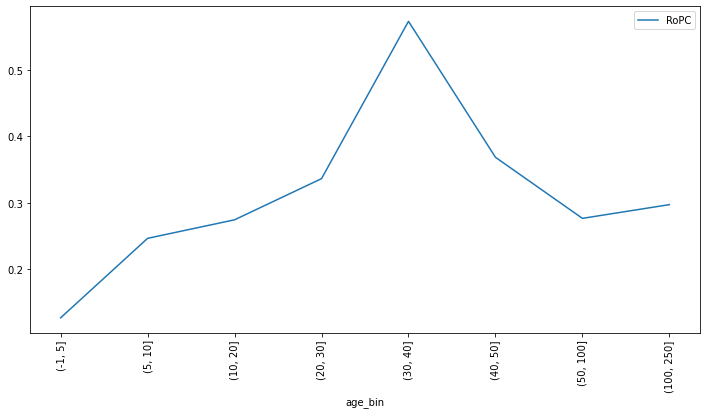

In [48]:
agg_age_bin[['RoPC']].plot(figsize=(12,6), rot = 90)

# KL binning

In [49]:
bins_KL = [-10, 13, 14, 15, 16, 17, 18, 25]
#labels =['age0-5','age5-10','age10-20','age20-30','age30-40','age40-50','age50-100','age100-250']
InterF2['KL_bin'] = pd.cut(InterF2['lnKL_ratio'], bins_KL)
InterF2.head(5)

,I16,bonus,pf,welfare,a7,a5,a9,yr,blk,b02,...,KY_ratio,RoPC,KL_ratio,lnK,lnKL_ratio,nic_code,code,activity,age_bin,KL_bin
index,,,,,,,,,,,,,,,,,,,,,
100003,0.0,3435006.0,52010887.0,11125619,01,35101,1,18,B,4,...,3.629259,0.197992,1.136428e+07,22.670854,16.245985,35,35,"Electricity, gas, steam and air conditioning ...","(5, 10]","(16, 17]"
100005,0.0,0.0,17252616.0,7365503,01,35101,1,18,B,4,...,6.380350,0.138879,6.480917e+07,22.846770,17.986958,35,35,"Electricity, gas, steam and air conditioning ...","(-1, 5]","(17, 18]"
100006,0.0,0.0,42366395.0,15214824,01,35101,1,18,B,4,...,2.967558,0.317342,6.506124e+07,23.625629,17.990839,35,35,"Electricity, gas, steam and air conditioning ...","(-1, 5]","(17, 18]"
100009,0.0,117885.0,107184.0,181520,01,10307,2,18,B,2,...,0.999938,0.222725,2.769030e+05,15.364636,12.531423,10,10,Manufacture of food products,"(20, 30]","(-10, 13]"
100010,0.0,635045.0,1451695.0,235857,01,10304,2,18,B,7,...,5.152710,0.120262,4.085460e+06,19.776822,15.222945,10,10,Manufacture of food products,"(10, 20]","(15, 16]"


In [50]:
agg_KL_bin = InterF2.groupby('KL_bin').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
)
agg_KL_bin['RoPC'] = (1-agg_KL_bin['TE']/agg_KL_bin['gva'])/(agg_KL_bin['capital']/agg_KL_bin['gva'])

agg_KL_bin

,firms,capital,gva,TE,RoPC
KL_bin,,,,,
"(-10, 13]",20387,7.620366e+11,1.593982e+12,8.742047e+11,0.944544
"(13, 14]",11346,2.045778e+12,2.266774e+12,9.073224e+11,0.664516
"(14, 15]",6548,4.001675e+12,2.887527e+12,9.153664e+11,0.492834
"(15, 16]",2199,4.888525e+12,1.744107e+12,5.260253e+11,0.249172
"(16, 17]",597,5.190481e+12,1.385985e+12,2.327840e+11,0.222176
"(17, 18]",185,4.707660e+12,6.536006e+11,1.089099e+11,0.115703
"(18, 25]",109,6.108529e+12,7.167560e+11,3.826163e+10,0.111073


<AxesSubplot:xlabel='KL_bin'>

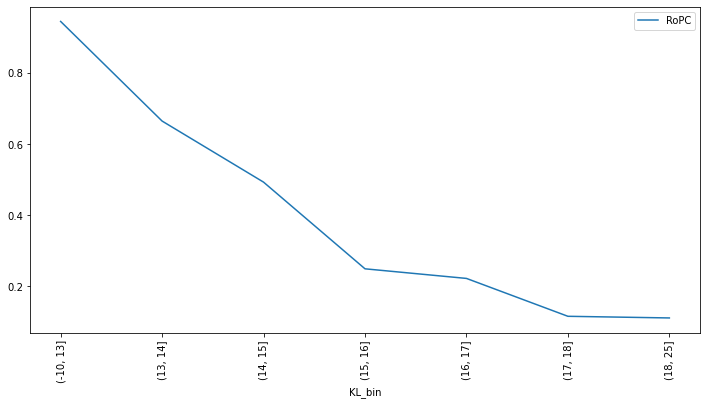

In [51]:
agg_KL_bin[['RoPC']].plot(figsize=(12,6), rot = 90)

# Labour Binning

In [52]:
bins_L = [0,5,10,20,40,60,80,100, 150, 250, 500, 1000, 2000, 5000, 100000]


InterF2['L_bin'] = pd.cut(InterF2['E16'], bins_L)


In [53]:
agg_L_bin = InterF2.groupby('L_bin').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
)

agg_L_bin['RoPC'] = (1-agg_L_bin['TE']/agg_L_bin['gva'])/(agg_L_bin['capital']/agg_L_bin['gva'])


In [54]:
agg_L_bin

,firms,capital,gva,TE,RoPC
L_bin,,,,,
"(0, 5]",1594,4.446868e+10,6.695029e+09,6.991539e+08,0.134834
"(5, 10]",3638,3.700447e+10,1.384242e+10,4.056834e+09,0.264443
"(10, 20]",5612,1.519902e+11,5.439000e+10,1.594747e+10,0.252928
"(20, 40]",5178,2.193270e+11,9.673950e+10,3.301374e+10,0.290551
"(40, 60]",2858,2.124279e+11,1.085320e+11,3.424025e+10,0.349727
"(60, 80]",1960,2.103121e+11,1.204095e+11,3.468711e+10,0.407596
"(80, 100]",1738,1.888958e+11,1.153855e+11,3.764520e+10,0.411551
"(100, 150]",4499,6.741592e+11,3.682089e+11,1.396723e+11,0.338995
"(150, 250]",4803,1.331155e+12,7.271452e+11,2.688246e+11,0.344303


<AxesSubplot:xlabel='L_bin'>

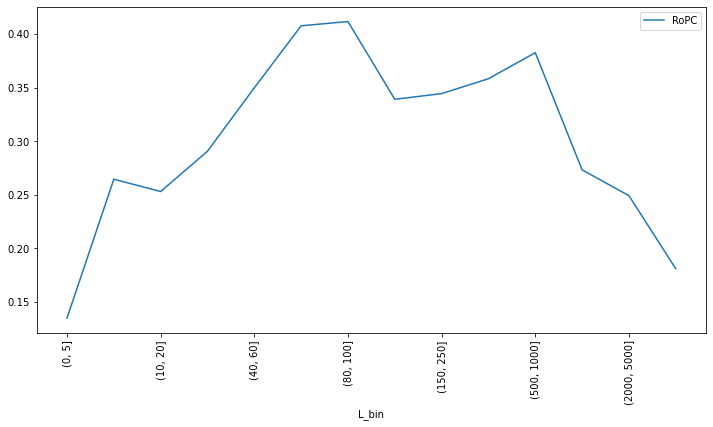

In [55]:
agg_L_bin[['RoPC']].plot(figsize=(12,6), rot = 90)

# Taking transpose

In [56]:
blkC = pd.read_stata(r'C:\Users\ADMIN\Desktop\ASI\data\blkC201718.dta')

blkC = blkC[['ac01','c_11','c_112','c_113']]
blkC['nvaK'] = (blkC['c_112'] + blkC['c_113'])/2
blkC.head()


,ac01,c_11,c_112,c_113,nvaK
0,100001,1,285500.0,285500.0,285500.0
1,100001,2,391054.0,366862.0,378958.0
2,100001,3,709621.0,709621.0,709621.0
3,100001,4,0.0,0.0,0.0
4,100001,5,0.0,0.0,0.0


In [57]:
blkC.replace({'c_11': {1: 'land', 2: 'building', 3: 'plant_and_machinery' , 
                       4: 'transport_equipment', 
                       5: 'computer_equipment_incl_software', 6: 'pollution_control_equipment',
                       7: 'other_fixed_assets' , 
                       8: 'subtotal_2_7', 9: 'capital_wip', 10: 'total'}}, inplace = True)


In [58]:
blkC.head()

,ac01,c_11,c_112,c_113,nvaK
0,100001,land,285500.0,285500.0,285500.0
1,100001,building,391054.0,366862.0,378958.0
2,100001,plant_and_machinery,709621.0,709621.0,709621.0
3,100001,transport_equipment,0.0,0.0,0.0
4,100001,computer_equipment_incl_software,0.0,0.0,0.0


In [59]:
transpose = blkC.pivot(index="ac01", columns="c_11", values="nvaK")

transpose.head()

c_11,building,capital_wip,computer_equipment_incl_software,land,other_fixed_assets,plant_and_machinery,pollution_control_equipment,subtotal_2_7,total,transport_equipment
ac01,,,,,,,,,,
100001,3.789580e+05,0.0,0.0,285500.0,70857.0,7.096210e+05,0.0,1.159436e+06,1.444936e+06,0.0
100002,2.746895e+06,0.0,0.0,0.0,17000.0,1.738676e+07,0.0,2.095430e+07,2.095430e+07,803645.0
100003,6.528961e+08,494680.5,2893448.0,285886359.0,62627900.0,6.002033e+09,0.0,6.725378e+09,7.011759e+09,4928078.0
100004,1.267169e+10,100669222.5,2624611.5,25287619.5,44654873.5,3.496076e+09,0.0,1.622775e+10,1.635371e+10,12703087.5
100005,5.468918e+09,11845359.5,2867301.0,191173351.0,64609856.5,2.614476e+09,0.0,8.157364e+09,8.360383e+09,6493070.0


In [60]:
transpose['plant_machinery_new'] = transpose['plant_and_machinery'] + transpose['pollution_control_equipment'] + transpose['other_fixed_assets']

transpose.head()

c_11,building,capital_wip,computer_equipment_incl_software,land,other_fixed_assets,plant_and_machinery,pollution_control_equipment,subtotal_2_7,total,transport_equipment,plant_machinery_new
ac01,,,,,,,,,,,
100001,3.789580e+05,0.0,0.0,285500.0,70857.0,7.096210e+05,0.0,1.159436e+06,1.444936e+06,0.0,7.804780e+05
100002,2.746895e+06,0.0,0.0,0.0,17000.0,1.738676e+07,0.0,2.095430e+07,2.095430e+07,803645.0,1.740376e+07
100003,6.528961e+08,494680.5,2893448.0,285886359.0,62627900.0,6.002033e+09,0.0,6.725378e+09,7.011759e+09,4928078.0,6.064661e+09
100004,1.267169e+10,100669222.5,2624611.5,25287619.5,44654873.5,3.496076e+09,0.0,1.622775e+10,1.635371e+10,12703087.5,3.540731e+09
100005,5.468918e+09,11845359.5,2867301.0,191173351.0,64609856.5,2.614476e+09,0.0,8.157364e+09,8.360383e+09,6493070.0,2.679086e+09


In [61]:
InterF3 = pd.merge(InterF2, transpose, left_index=True, right_index = True)


In [62]:
InterF3.index

Index(['100003', '100005', '100006', '100009', '100010', '100012', '100013',
       '100015', '100016', '100018',
       ...
       '224931', '224935', '224939', '224941', '224945', '224948', '224951',
       '224961', '224969', '224983'],
      dtype='object', length=41371)

In [63]:
depr_L_bin = InterF3.groupby('L_bin').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_L_bin['RoPC'] = (1-depr_L_bin['TE']/depr_L_bin['gva'])/(depr_L_bin['capital']/depr_L_bin['gva'])

depr_L_bin

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC
L_bin,,,,,,,,,,,
"(0, 5]",1594,4.446868e+10,2.440189e+09,1.917548e+09,3.807564e+10,4.779994e+08,1.960539e+07,1.537701e+09,6.695029e+09,6.991539e+08,0.134834
"(5, 10]",3638,3.700447e+10,4.142680e+09,6.160662e+09,2.399582e+10,1.824539e+09,6.631375e+07,8.144595e+08,1.384242e+10,4.056834e+09,0.264443
"(10, 20]",5612,1.519902e+11,1.228676e+10,2.320107e+10,9.516483e+10,4.692007e+09,3.435578e+08,1.630192e+10,5.439000e+10,1.594747e+10,0.252928
"(20, 40]",5178,2.193270e+11,2.526471e+10,3.710226e+10,1.417765e+11,7.893870e+09,5.892398e+08,6.700378e+09,9.673950e+10,3.301374e+10,0.290551
"(40, 60]",2858,2.124279e+11,2.214470e+10,4.159842e+10,1.123967e+11,5.590477e+09,6.087701e+08,3.008883e+10,1.085320e+11,3.424025e+10,0.349727
"(60, 80]",1960,2.103121e+11,3.005098e+10,3.466634e+10,1.241673e+11,4.871879e+09,7.243459e+08,1.583123e+10,1.204095e+11,3.468711e+10,0.407596
"(80, 100]",1738,1.888958e+11,1.771965e+10,3.688765e+10,1.193585e+11,5.098606e+09,9.848411e+08,8.846502e+09,1.153855e+11,3.764520e+10,0.411551
"(100, 150]",4499,6.741592e+11,7.440676e+10,1.495038e+11,4.127527e+11,1.414419e+10,3.204440e+09,2.014736e+10,3.682089e+11,1.396723e+11,0.338995
"(150, 250]",4803,1.331155e+12,1.390217e+11,2.749787e+11,8.003728e+11,2.148179e+10,6.241730e+09,8.905860e+10,7.271452e+11,2.688246e+11,0.344303


In [64]:
depr_L_bin['depr'] = (depr_L_bin['land'] * 0 + depr_L_bin['building']*0.025 + depr_L_bin['plant_machinery_new']*0.08 \
                     + depr_L_bin['transport_equipment']*0.10 + depr_L_bin['computer_equipment_incl_software']*0.40 \
                     + depr_L_bin['capital_wip']*0.08)/ depr_L_bin['capital']

depr_L_bin

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr
L_bin,,,,,,,,,,,,
"(0, 5]",1594,4.446868e+10,2.440189e+09,1.917548e+09,3.807564e+10,4.779994e+08,1.960539e+07,1.537701e+09,6.695029e+09,6.991539e+08,0.134834,0.073594
"(5, 10]",3638,3.700447e+10,4.142680e+09,6.160662e+09,2.399582e+10,1.824539e+09,6.631375e+07,8.144595e+08,1.384242e+10,4.056834e+09,0.264443,0.063447
"(10, 20]",5612,1.519902e+11,1.228676e+10,2.320107e+10,9.516483e+10,4.692007e+09,3.435578e+08,1.630192e+10,5.439000e+10,1.594747e+10,0.252928,0.066478
"(20, 40]",5178,2.193270e+11,2.526471e+10,3.710226e+10,1.417765e+11,7.893870e+09,5.892398e+08,6.700378e+09,9.673950e+10,3.301374e+10,0.290551,0.063060
"(40, 60]",2858,2.124279e+11,2.214470e+10,4.159842e+10,1.123967e+11,5.590477e+09,6.087701e+08,3.008883e+10,1.085320e+11,3.424025e+10,0.349727,0.062333
"(60, 80]",1960,2.103121e+11,3.005098e+10,3.466634e+10,1.241673e+11,4.871879e+09,7.243459e+08,1.583123e+10,1.204095e+11,3.468711e+10,0.407596,0.061069
"(80, 100]",1738,1.888958e+11,1.771965e+10,3.688765e+10,1.193585e+11,5.098606e+09,9.848411e+08,8.846502e+09,1.153855e+11,3.764520e+10,0.411551,0.063963
"(100, 150]",4499,6.741592e+11,7.440676e+10,1.495038e+11,4.127527e+11,1.414419e+10,3.204440e+09,2.014736e+10,3.682089e+11,1.396723e+11,0.338995,0.060914
"(150, 250]",4803,1.331155e+12,1.390217e+11,2.749787e+11,8.003728e+11,2.148179e+10,6.241730e+09,8.905860e+10,7.271452e+11,2.688246e+11,0.344303,0.062107


In [65]:
depr_L_bin['wt_avg_price_rise'] = (depr_L_bin['land'] * 0.0279 + depr_L_bin['building']*0.0279 + depr_L_bin['plant_machinery_new']*0.0166 \
                     + depr_L_bin['transport_equipment']*0.0063 + depr_L_bin['computer_equipment_incl_software']*0.0156 \
                     + depr_L_bin['capital_wip']*0.0166)/ depr_L_bin['capital']



In [66]:
depr_L_bin['price_diff'] = depr_L_bin['wt_avg_price_rise'] - 0.03286

In [67]:
depr_L_bin['RoPC_final'] = depr_L_bin['RoPC'] + depr_L_bin['price_diff'] - depr_L_bin['depr']

depr_L_bin['RoPC_final']

L_bin
(0, 5]            0.045975
(5, 10]           0.187373
(10, 20]          0.172508
(20, 40]          0.214071
(40, 60]          0.274250
(60, 80]          0.333503
(80, 100]         0.334311
(100, 150]        0.265353
(150, 250]        0.269279
(250, 500]        0.283690
(500, 1000]       0.302446
(1000, 2000]      0.191083
(2000, 5000]      0.166143
(5000, 100000]    0.096640
Name: RoPC_final, dtype: float64

# Analysis by Type of Organisation

In [68]:
InterF3['type_of_ownership'] = InterF3['b02']

InterF3 = InterF3.replace({'type_of_ownership': {1: 'Individual Proprietorship', 
                                                 2: 'Partnership',
                                                 3: 'Limited Liability Partnership',
                                                 4: 'Government Company-Public',
                                                 5: 'Government Company-Private',
                                                 6: 'Non-Government Company-Public',
                                                 7: 'Non-Government Company-Private',
                                                 8: 'Co-operative Society',
                                                 9: 'Others'}})

In [69]:
depr_type_bin = InterF3.groupby('type_of_ownership').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_type_bin['RoPC'] = (1-depr_type_bin['TE']/depr_type_bin['gva'])/(depr_type_bin['capital']/depr_type_bin['gva'])

depr_type_bin['depr'] = (depr_type_bin['land'] * 0 + depr_type_bin['building']*0.025 + depr_type_bin['plant_machinery_new']*0.08 \
                     + depr_type_bin['transport_equipment']*0.10 + depr_type_bin['computer_equipment_incl_software']*0.40 \
                     + depr_type_bin['capital_wip']*0.08)/ depr_type_bin['capital']

depr_type_bin['wt_avg_price_rise'] = (depr_type_bin['land'] * 0.0279 + depr_type_bin['building']*0.0279 + depr_type_bin['plant_machinery_new']*0.0166 \
                     + depr_type_bin['transport_equipment']*0.0063 + depr_type_bin['computer_equipment_incl_software']*0.0156 \
                     + depr_type_bin['capital_wip']*0.0166)/ depr_type_bin['capital']


depr_type_bin['price_diff'] = depr_type_bin['wt_avg_price_rise'] - 0.03286

depr_type_bin['RoPC_final'] = depr_type_bin['RoPC'] + depr_type_bin['price_diff'] - depr_type_bin['depr']

depr_type_bin['RoPC_final']

type_of_ownership
Co-operative Society             -0.184831
Government Company-Private        0.118263
Government Company-Public         0.167020
Individual Proprietorship         0.433377
Limited Liability Partnership     0.732675
Non-Government Company-Private    0.242012
Non-Government Company-Public     0.171668
Others                            0.504374
Partnership                       0.552470
Name: RoPC_final, dtype: float64

In [70]:
depr_type_bin = InterF3.groupby('b02').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_type_bin['RoPC'] = (1-depr_type_bin['TE']/depr_type_bin['gva'])/(depr_type_bin['capital']/depr_type_bin['gva'])

depr_type_bin['depr'] = (depr_type_bin['land'] * 0 + depr_type_bin['building']*0.025 + depr_type_bin['plant_machinery_new']*0.08 \
                     + depr_type_bin['transport_equipment']*0.10 + depr_type_bin['computer_equipment_incl_software']*0.40 \
                     + depr_type_bin['capital_wip']*0.08)/ depr_type_bin['capital']

depr_type_bin['wt_avg_price_rise'] = (depr_type_bin['land'] * 0.0279 + depr_type_bin['building']*0.0279 + depr_type_bin['plant_machinery_new']*0.0166 \
                     + depr_type_bin['transport_equipment']*0.0063 + depr_type_bin['computer_equipment_incl_software']*0.0156 \
                     + depr_type_bin['capital_wip']*0.0166)/ depr_type_bin['capital']


depr_type_bin['price_diff'] = depr_type_bin['wt_avg_price_rise'] - 0.03286

depr_type_bin['RoPC_final'] = depr_type_bin['RoPC'] + depr_type_bin['price_diff'] - depr_type_bin['depr']

depr_type_bin['RoPC_final']

b02
1    0.433377
2    0.552470
3    0.732675
4    0.167020
5    0.118263
6    0.171668
7    0.242012
8   -0.184831
9    0.504374
Name: RoPC_final, dtype: float64

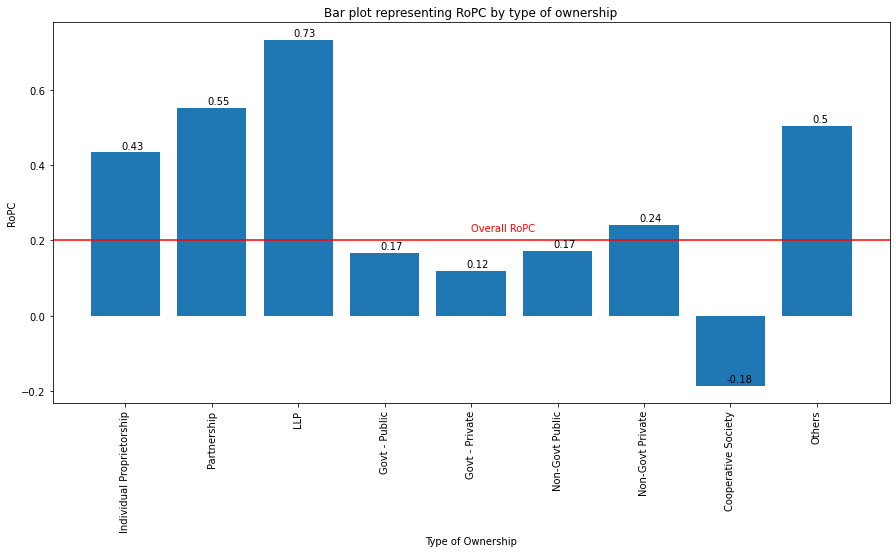

In [71]:
# Importing the matplotlib library
import matplotlib.pyplot as plt# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (15,7))# Categorical data: Country names


ownership = ['Individual Proprietorship', 'Partnership','LLP', 'Govt - Public', 'Govt - Private','Non-Govt Public',
        'Non-Govt Private','Cooperative Society', 'Others']


ropc = list(depr_type_bin.RoPC_final)

plt.bar(ownership, ropc, 
        #width= 0.9, align='center',
        #color='cyan', 
        #edgecolor = 'red'
       )# This is the location for the annotated text

plt.xticks(ownership, rotation='vertical')



for i in range(len(ownership)):
    #plt.annotate(ropc[i], (-0.1 + i, ropc[i] + j))# Creating the legend of the bars in the plot
    plt.text(x = i-.05 , y = ropc[i]+.01, s = np.round(ropc[i],2), size = 10)

plt.axhline(y=0.2, color='r', linestyle='-')
plt.annotate("Overall RoPC", xy=(0.5, 0.45), xycoords="axes fraction", color = 'r')

plt.title("Bar plot representing RoPC by type of ownership")# Namimg the x and y axis
plt.xlabel('Type of Ownership')
plt.ylabel('RoPC')# Saving the plot as a 'png'
plt.savefig('1BarPlot.png')# Displaying the bar plot
plt.show()

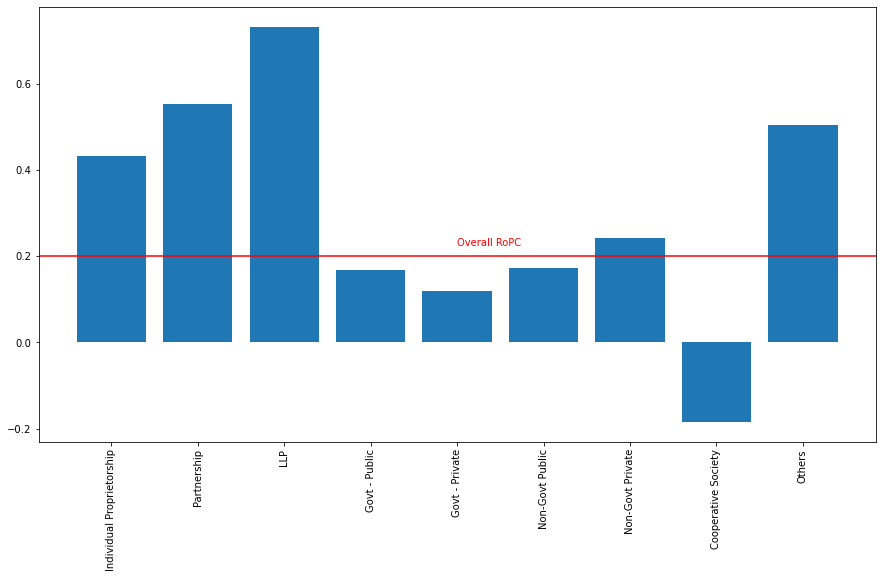

In [72]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(15, 8))
ownership = ['Individual Proprietorship', 'Partnership','LLP', 'Govt - Public', 'Govt - Private','Non-Govt Public',
        'Non-Govt Private','Cooperative Society', 'Others']
ropc = depr_type_bin.RoPC_final
ax.bar(ownership,ropc)
ax.set_facecolor("white")
ax.set_xticks(ownership)
ax.set_xticklabels(ownership, rotation='vertical')
ax.annotate("Overall RoPC", xy=(0.5, 0.45), xycoords="axes fraction", color = 'r')




plt.axhline(y=0.2, color='r', linestyle='-')

#fig.tight_layout()
plt.show()

### Key Takeaways

* Cooperatives have a negative return on physical capital as their GVA is less than TE

* Non-Government private entities have higher returns as compared to their government private counterparts, however, the difference seems not so significant in case of public companies.

# By type of activity

In [73]:
depr_activity = InterF3.groupby('activity').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_activity['RoPC'] = (1-depr_activity['TE']/depr_activity['gva'])/(depr_activity['capital']/depr_activity['gva'])

depr_activity['depr'] = (depr_activity['land'] * 0 + depr_activity['building']*0.025 + depr_activity['plant_machinery_new']*0.08 \
                     + depr_activity['transport_equipment']*0.10 + depr_activity['computer_equipment_incl_software']*0.40 \
                     + depr_activity['capital_wip']*0.08)/ depr_activity['capital']

depr_activity['wt_avg_price_rise'] = (depr_activity['land'] * 0.0279 + depr_activity['building']*0.0279 + depr_activity['plant_machinery_new']*0.0166 \
                     + depr_activity['transport_equipment']*0.0063 + depr_activity['computer_equipment_incl_software']*0.0156 \
                     + depr_activity['capital_wip']*0.0166)/ depr_activity['capital']


depr_activity['price_diff'] = depr_activity['wt_avg_price_rise'] - 0.03286

depr_activity['RoPC_final'] = depr_activity['RoPC'] + depr_activity['price_diff'] - depr_activity['depr']





In [74]:
# Filter out activties with low number of firms
depr_activity = depr_activity.loc[depr_activity['firms'] > 10]

depr_activity

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr,wt_avg_price_rise,price_diff,RoPC_final
activity,,,,,,,,,,,,,,,
"Electricity, gas, steam and air conditioning supply",426,3.389351e+12,8.844197e+10,2.534660e+11,2.820418e+12,1.456275e+09,2.418381e+09,2.231503e+11,4.429547e+11,4.036962e+10,0.118779,0.074036,0.017735,-0.015125,0.029618
Manufacture of basic metals,2416,6.338207e+12,4.057218e+11,8.056298e+11,4.431267e+12,2.161539e+10,7.274961e+09,6.666974e+11,1.239261e+12,3.791678e+11,0.135700,0.068324,0.018723,-0.014137,0.053240
Manufacture of beverages,732,2.889237e+11,4.401112e+10,5.201978e+10,1.705869e+11,3.818131e+09,7.355952e+08,1.775218e+10,1.772439e+11,4.142221e+10,0.470095,0.058990,0.020217,-0.012643,0.398462
Manufacture of chemicals and chemical products,2620,2.726967e+12,2.198063e+11,2.678039e+11,1.999145e+12,1.347853e+10,1.080472e+10,2.159293e+11,8.176476e+11,2.665867e+11,0.202078,0.069517,0.018566,-0.014294,0.118267
Manufacture of coke and refined petroleum products,410,3.989117e+12,2.986060e+11,1.141731e+11,2.386962e+12,2.291155e+09,5.614380e+09,1.181470e+12,1.456158e+12,1.065868e+11,0.338313,0.072899,0.017762,-0.015098,0.250316
"Manufacture of computer, electronic and optical products",762,1.860085e+11,4.438524e+10,3.782928e+10,8.611062e+10,2.869802e+09,6.746067e+09,8.067453e+09,2.870386e+11,1.222008e+11,0.886184,0.061639,0.021399,-0.011461,0.813085
Manufacture of electrical equipment,2126,4.407230e+11,4.331325e+10,1.127071e+11,2.307551e+11,5.781795e+09,5.373447e+09,4.279229e+10,4.345715e+11,1.768668e+11,0.584732,0.062236,0.020453,-0.012407,0.510088
"Manufacture of fabricated metal products, except machinery and equipment",2343,3.425571e+11,3.974830e+10,9.048997e+10,1.914090e+11,7.629300e+09,3.368669e+09,9.911816e+09,2.640430e+11,1.264944e+11,0.401535,0.059781,0.020657,-0.012203,0.329551
Manufacture of food products,6051,1.533940e+12,2.414495e+11,3.286003e+11,8.612858e+11,2.419508e+10,5.344075e+09,7.306502e+10,7.457101e+11,2.797443e+11,0.303771,0.057056,0.020633,-0.012227,0.234488


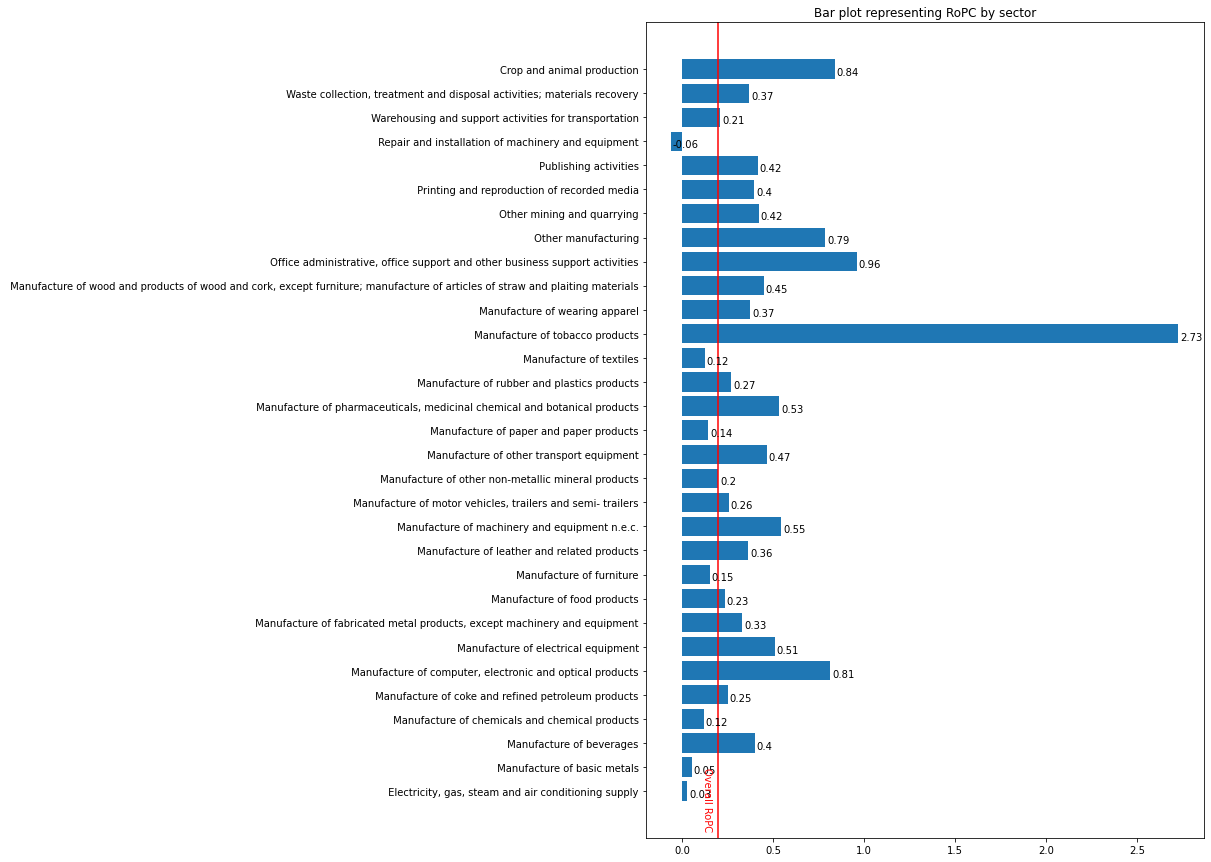

In [75]:
# Importing the matplotlib library
import matplotlib.pyplot as plt# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (10,15))# Categorical data: Country names


ownership = depr_activity.index


ropc = list(depr_activity.RoPC_final)

plt.barh(ownership, ropc, 
        #width= 0.9, align='center',
        #color='cyan', 
        #edgecolor = 'red'
       )# This is the location for the annotated text

#plt.xticks(ownership, rotation='vertical')



for i in range(len(ownership)):
    #plt.annotate(ropc[i], (-0.1 + i, ropc[i] + j))# Creating the legend of the bars in the plot
    plt.text(y = i-0.25 , x = ropc[i]+.01, s = np.round(ropc[i],2), size = 10)

plt.axvline(x=0.2, color='r', linestyle='-')
plt.annotate("Overall RoPC", xy=(0.10, 0.01), xycoords="axes fraction", color = 'r', rotation=-90)

plt.title("Bar plot representing RoPC by sector")# Namimg the x and y axis
#plt.xlabel('Sector')
#plt.ylabel('RoPC')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png', bbox_inches = "tight")# Displaying the bar plot

plt.show()


# Analysis by Size of firms

In [76]:
micro_plant_machinery = 10000000 # 1crore
micro_output = 50000000 # 5 crore

small_plant_machinery = 100000000 # 10 crore
small_output = 500000000  # 50 crore

medium_plant_machinery = 500000000 # 50 corore
medium_output = 2500000000 # 250 crore

In [77]:
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions
conditions = [
    (InterF3['plant_and_machinery'] <= micro_plant_machinery) & (InterF3['Out'] <= micro_output),
    
    (InterF3['plant_and_machinery'] <= small_plant_machinery) & (InterF3['Out'] <= small_output),
    
    (InterF3['plant_and_machinery'] <= medium_plant_machinery) & (InterF3['Out'] <= medium_output),
    
    (InterF3['plant_and_machinery'] > medium_plant_machinery) | (InterF3['Out'] > medium_output)
    
    ]

# create a list of the values we want to assign for each condition
values = ['micro', 'small', 'medium', 'large']

# create a new column and use np.select to assign values to it using our lists as arguments
InterF3['msme'] = np.select(conditions, values)

In [78]:
depr_msme = InterF3.groupby('msme').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_msme['RoPC'] = (1-depr_msme['TE']/depr_msme['gva'])/(depr_msme['capital']/depr_msme['gva'])

depr_msme['depr'] = (depr_msme['land'] * 0 + depr_msme['building']*0.025 + depr_msme['plant_machinery_new']*0.08 \
                     + depr_msme['transport_equipment']*0.10 + depr_msme['computer_equipment_incl_software']*0.40 \
                     + depr_msme['capital_wip']*0.08)/ depr_msme['capital']

depr_msme['wt_avg_price_rise'] = (depr_msme['land'] * 0.0279 + depr_msme['building']*0.0279 + depr_msme['plant_machinery_new']*0.0166 \
                     + depr_msme['transport_equipment']*0.0063 + depr_msme['computer_equipment_incl_software']*0.0156 \
                     + depr_msme['capital_wip']*0.0166)/ depr_msme['capital']


depr_msme['price_diff'] = depr_msme['wt_avg_price_rise'] - 0.03286

depr_msme['RoPC_final'] = depr_msme['RoPC'] + depr_msme['price_diff'] - depr_msme['depr']





In [79]:
depr_msme

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr,wt_avg_price_rise,price_diff,RoPC_final
msme,,,,,,,,,,,,,,,
large,4722,2.452022e+13,1.864945e+12,2.980045e+12,1.665910e+13,9.542949e+10,9.332016e+10,2.827372e+12,8.795306e+12,2.352570e+12,0.262752,0.068527,0.018789,-0.014071,0.180154
medium,9357,2.401077e+12,3.411080e+11,5.855596e+11,1.279540e+12,5.104358e+10,1.923908e+10,1.245863e+11,1.821885e+12,8.713262e+11,0.395888,0.058211,0.020734,-0.012126,0.325552
micro,11663,6.139662e+10,1.374290e+10,1.638082e+10,2.282395e+10,6.581023e+09,3.022647e+08,1.565660e+09,4.666093e+10,3.186993e+10,0.240909,0.051138,0.021035,-0.011825,0.177946
small,15629,7.219966e+11,1.251931e+11,1.949876e+11,3.360686e+11,3.665043e+10,5.049094e+09,2.404781e+10,5.848807e+11,3.471081e+11,0.329326,0.054528,0.021081,-0.011779,0.263020


# Analysis by State

In [80]:
states = pd.read_excel(r'C:\Users\ADMIN\Desktop\ASI\data\state_list_new.xlsx', dtype={'Code': object})

InterF3 = InterF3.reset_index()

InterF4 = pd.merge(InterF3,states, left_on = 'a7', right_on = 'Code')


In [81]:
pd.set_option('display.max_columns', None)
InterF4.describe()

,I16,bonus,pf,welfare,a9,b02,b04,b05,b06f,b06t,b07,b08,b09,d13,d14,E16,E17,E18,F8,F9,F10,F1,F2A,F2B,F3,F4,F5,F6,F7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H16,J17,J18,J19,J110,J111,c_19,c_17,c_112,c_113,nvaK,Inp,Out,GVA,TE,Age,SoC,KY_ratio,RoPC,KL_ratio,lnK,lnKL_ratio,building,capital_wip,computer_equipment_incl_software,land,other_fixed_assets,plant_and_machinery,pollution_control_equipment,subtotal_2_7,total,transport_equipment,plant_machinery_new
count,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,4.137100e+04,4.137100e+04,41371.000000,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,41371.000000,41371.000000,41371.000000,4.137100e+04,4.137100e+04,41371.000000,41371.000000,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04,4.137100e+04
mean,3.179665e+08,3.218059e+06,6.187140e+06,4.906029e+06,1.550893,4.710256,1.877571,1998.205361,3.999782,3.005197,11.695826,1.942206,2.932610,6.567014e+07,6.941999e+07,244.666892,1.081647e+05,7.277572e+07,2.795725e+06,8.311337e+05,3.594117e+07,1.804234e+07,1.873935e+06,1.158558e+07,6.707686e+07,1.497719e+07,1.811232e+06,1.287860e+06,1.256914e+06,2.231394e+07,2.987609e+07,3.278084e+06,1.531424e+07,9.642813e+06,1.918276e+05,2.577090e+06,4.744362e+05,4.433029e+04,5.209482e+06,7.245232e+08,1.498448e+09,4.153188e+07,7.030747e+07,3.596873e+07,5.283392e+06,4.646009e+07,9.594827e+08,6.598826e+08,6.794462e+08,6.696644e+08,1.160402e+09,1.432301e+09,2.718990e+08,8.708695e+07,19.794639,0.348891,2.518426,3.118372e+05,1.923560e+06,17.207427,12.936991,9.129518e+07,7.197245e+07,2.850078e+06,5.668195e+07,1.918736e+07,4.197847e+08,3.307214e+06,5.410100e+08,6.696644e+08,4.585447e+06,4.422793e+08
std,1.086540e+10,3.257973e+07,5.275146e+07,3.343559e+07,0.497409,2.611422,0.327784,16.909293,0.102777,0.210429,1.341715,0.233357,0.316118,5.352764e+08,6.266682e+08,797.393416,2.641932e+06,3.707374e+08,2.904075e+07,2.859660e+07,5.836187e+08,1.558517e+08,1.376164e+07,1.221570e+08,5.801061e+08,3.232849e+08,2.913705e+07,5.162095e+07,5.155089e+07,3.165471e+08,8.671529e+08,1.105126e+08,3.268017e+08,2.565155e+08,7.143409e+06,1.006720e+08,1.614673e+07,2.477365e+06,9.821663e+07,4.564648e+09,1.771980e+10,1.241117e+09,2.328355e+09,3.644680e+08,2.869807e+08,4.367690e+08,1.586493e+10,1.180491e+10,1.248919e+10,1.214009e+10,1.341938e+10,1.603478e+10,3.401379e+09,4.568680e+08,16.909293,28.545448,152.644077,5.990514e+07,2.640791e+07,2.453853,1.648430,9.356483e+08,5.011634e+09,4.735675e+07,1.300221e+09,3.842645e+08,6.527652e+09,1.234590e+08,7.414184e+09,1.214009e+10,3.423996e+07,6.744312e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1774.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.763600e+10,0.000000e+00,-7.124900e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,1.038800e+04,-1.997058e+10,-5.417113e+10,0.000000e+00,0.000000,-2768.340468,-9621.937117,-1.595243e+08,1.980198e-03,-0.693147,-6.224558,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0

In [82]:
firms = InterF4.groupby('State').agg(
                nbr_of_firms = pd.NamedAgg(column = 'index', aggfunc = 'count'))


In [83]:
depr_state = InterF4.groupby('State').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_state['RoPC'] = (1-depr_state['TE']/depr_state['gva'])/(depr_state['capital']/depr_state['gva'])

depr_state['depr'] = (depr_state['land'] * 0 + depr_state['building']*0.025 + depr_state['plant_machinery_new']*0.08 \
                     + depr_state['transport_equipment']*0.10 + depr_state['computer_equipment_incl_software']*0.40 \
                     + depr_state['capital_wip']*0.08)/ depr_state['capital']

depr_state['wt_avg_price_rise'] = (depr_state['land'] * 0.0279 + depr_state['building']*0.0279 + depr_state['plant_machinery_new']*0.0166 \
                     + depr_state['transport_equipment']*0.0063 + depr_state['computer_equipment_incl_software']*0.0156 \
                     + depr_state['capital_wip']*0.0166)/ depr_state['capital']


depr_state['price_diff'] = depr_state['wt_avg_price_rise'] - 0.03286

depr_state['RoPC_final'] = depr_state['RoPC'] + depr_state['price_diff'] - depr_state['depr']

In [84]:
depr_state

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr,wt_avg_price_rise,price_diff,RoPC_final
State,,,,,,,,,,,,,,,
Andaman & Nicobar Island,8,1.503235e+08,8.193666e+06,4.002516e+07,9.976886e+07,1.951772e+06,3.840145e+05,0.000000e+00,5.364224e+07,4.258203e+07,0.073576,0.062072,0.020088,-0.012772,-0.001268
Andhra Pradesh,1486,1.384179e+12,6.544054e+10,1.768227e+11,1.020141e+12,6.253268e+09,6.503714e+09,1.090180e+11,2.558930e+11,1.151853e+11,0.101654,0.070786,0.018527,-0.014333,0.016535
Arunachal Pradesh,76,1.617365e+09,1.209384e+08,4.347059e+08,1.001180e+09,4.732014e+07,2.571596e+06,1.064912e+07,1.346509e+09,3.249561e+08,0.631615,0.060329,0.020179,-0.012681,0.558605
Assam,991,2.178780e+11,7.259278e+09,2.851775e+10,1.770557e+11,2.269200e+09,4.454222e+08,2.330585e+09,1.194090e+11,2.435885e+10,0.436254,0.070998,0.018346,-0.014514,0.350742
Bihar,686,1.592006e+11,1.238398e+10,1.465843e+10,8.988690e+10,5.628981e+08,3.130724e+08,4.139538e+10,5.867071e+10,1.403731e+10,0.280359,0.069413,0.018481,-0.014379,0.196568
Chandigarh,77,7.784884e+09,1.619267e+09,1.433128e+09,4.278615e+09,3.131726e+08,3.423194e+07,1.064699e+08,4.556561e+09,2.903364e+09,0.212360,0.055447,0.020612,-0.012248,0.144665
Chhattisgarh,600,1.058486e+12,6.823170e+10,8.945044e+10,6.793561e+11,5.447018e+09,9.434105e+08,2.150573e+11,1.647135e+11,6.127301e+10,0.097725,0.070583,0.018229,-0.014631,0.012511
Dadara & Nagar Havelli,338,2.725389e+11,4.339434e+10,5.506926e+10,1.650980e+11,1.587206e+09,4.432746e+08,6.946806e+09,1.029261e+11,2.710882e+10,0.278189,0.056786,0.020621,-0.012239,0.209164
Daman & Diu,300,9.339515e+10,5.397085e+09,1.769755e+10,6.430064e+10,1.469906e+09,6.174414e+08,3.912520e+09,6.757254e+10,2.309904e+10,0.476186,0.067385,0.019226,-0.013634,0.395167


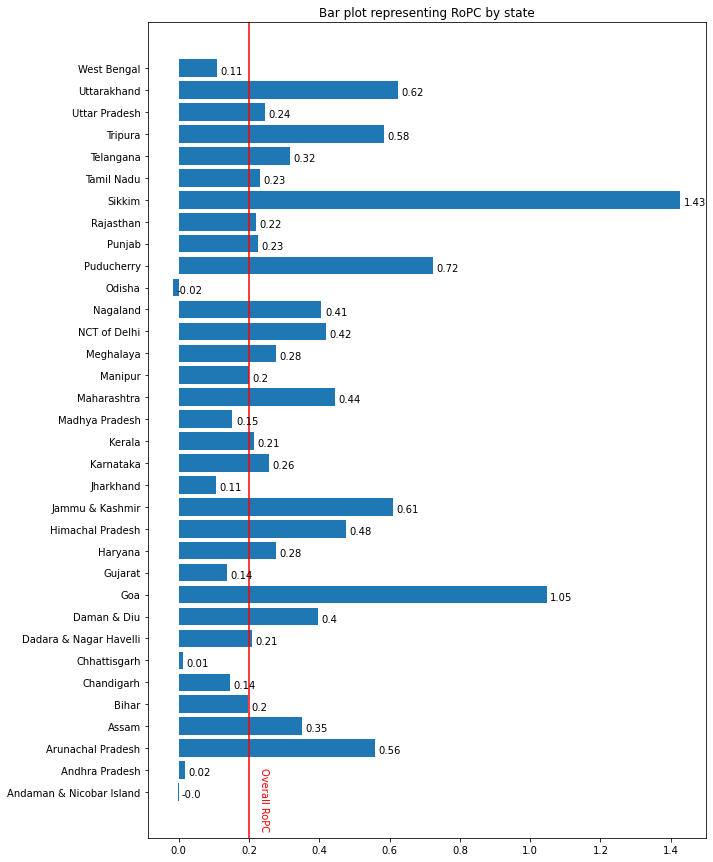

In [85]:
# Importing the matplotlib library
import matplotlib.pyplot as plt# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (10,15))# Categorical data: Country names


ownership = depr_state.index


ropc = list(depr_state.RoPC_final)

plt.barh(ownership, ropc, 
        #width= 0.9, align='center',
        #color='cyan', 
        #edgecolor = 'red'
       )# This is the location for the annotated text

#plt.xticks(ownership, rotation='vertical')



for i in range(len(ownership)):
    #plt.annotate(ropc[i], (-0.1 + i, ropc[i] + j))# Creating the legend of the bars in the plot
    plt.text(y = i-0.25 , x = ropc[i]+.01, s = np.round(ropc[i],2), size = 10)

plt.axvline(x=0.2, color='r', linestyle='-')
plt.annotate("Overall RoPC", xy=(0.20, 0.01), xycoords="axes fraction", color = 'r', rotation=-90)

plt.title("Bar plot representing RoPC by state")# Namimg the x and y axis
#plt.xlabel('Sector')
#plt.ylabel('RoPC')# Saving the plot as a 'png'
plt.savefig('3BarPlot.png', bbox_inches = "tight")# Displaying the bar plot

plt.show()


# By zone

In [86]:
depr_zone = InterF4.groupby('Zone').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_zone['RoPC'] = (1-depr_zone['TE']/depr_zone['gva'])/(depr_zone['capital']/depr_zone['gva'])

depr_zone['depr'] = (depr_zone['land'] * 0 + depr_zone['building']*0.025 + depr_zone['plant_machinery_new']*0.08 \
                     + depr_zone['transport_equipment']*0.10 + depr_zone['computer_equipment_incl_software']*0.40 \
                     + depr_zone['capital_wip']*0.08)/ depr_zone['capital']

depr_zone['wt_avg_price_rise'] = (depr_zone['land'] * 0.0279 + depr_zone['building']*0.0279 + depr_zone['plant_machinery_new']*0.0166 \
                     + depr_zone['transport_equipment']*0.0063 + depr_zone['computer_equipment_incl_software']*0.0156 \
                     + depr_zone['capital_wip']*0.0166)/ depr_zone['capital']


depr_zone['price_diff'] = depr_zone['wt_avg_price_rise'] - 0.03286

depr_zone['RoPC_final'] = depr_zone['RoPC'] + depr_zone['price_diff'] - depr_zone['depr']

In [87]:
depr_zone

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr,wt_avg_price_rise,price_diff,RoPC_final
Zone,,,,,,,,,,,,,,,
Central,1322,1.422779e+12,7.788187e+10,1.630083e+11,1.092732e+12,4.876355e+09,1.978553e+09,8.230108e+10,4.304050e+11,9.342580e+10,0.236846,0.069833,0.018477,-0.014383,0.152629
East,4070,6.482828e+12,4.072746e+11,7.608538e+11,4.515588e+12,2.025539e+10,1.102431e+10,7.678317e+11,1.134303e+12,3.901424e+11,0.114790,0.069126,0.018602,-0.014258,0.031406
North,12236,4.400143e+12,5.076408e+11,7.398488e+11,2.858092e+12,5.077248e+10,2.055427e+10,2.232347e+11,2.593117e+12,8.664972e+11,0.392401,0.063248,0.019680,-0.013180,0.315973
North-East,1601,3.321378e+11,1.307079e+10,5.113514e+10,2.588273e+11,3.347510e+09,6.272239e+08,5.129857e+09,2.547825e+11,3.660736e+10,0.656881,0.069190,0.018679,-0.014181,0.573510
South,12328,6.093422e+12,4.659942e+11,9.863317e+11,4.149355e+12,5.336751e+10,4.097921e+10,3.973942e+11,2.913741e+12,1.136468e+12,0.291671,0.067306,0.019196,-0.013664,0.210701
West,9814,8.973376e+12,8.731266e+11,1.075795e+12,5.422941e+12,5.708527e+10,4.274704e+10,1.501681e+12,3.922383e+12,1.079734e+12,0.316787,0.067274,0.018984,-0.013876,0.235637


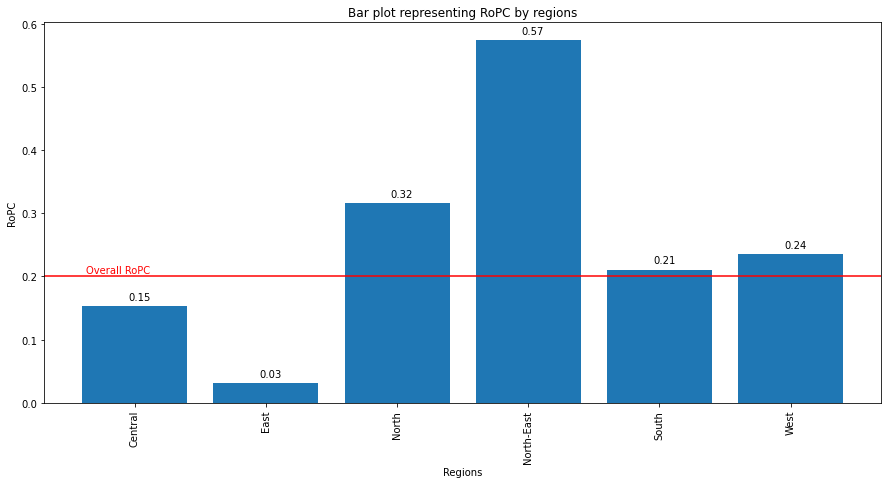

In [88]:
# Importing the matplotlib library
import matplotlib.pyplot as plt# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (15,7))# Categorical data: Country names


ownership = depr_zone.index


ropc = list(depr_zone.RoPC_final)

plt.bar(ownership, ropc, 
        #width= 0.9, align='center',
        #color='cyan', 
        #edgecolor = 'red'
       )# This is the location for the annotated text

plt.xticks(ownership, rotation='vertical')



for i in range(len(ownership)):
    #plt.annotate(ropc[i], (-0.1 + i, ropc[i] + j))# Creating the legend of the bars in the plot
    plt.text(x = i-.05 , y = ropc[i]+.01, s = np.round(ropc[i],2), size = 10)

plt.axhline(y=0.2, color='r', linestyle='-')
plt.annotate("Overall RoPC", xy=(0.05, 0.34), xycoords="axes fraction", color = 'r')

plt.title("Bar plot representing RoPC by regions")# Namimg the x and y axis
plt.xlabel('Regions')
plt.ylabel('RoPC')# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')# Displaying the bar plot
plt.show()

# By Rural-Urban

In [89]:
depr_zone = InterF4.groupby('a9').agg(
    firms = pd.NamedAgg(column = 'GVA', aggfunc = 'count'),
    capital=pd.NamedAgg(column='nvaK', aggfunc='sum'), 
    land = pd.NamedAgg(column = 'land', aggfunc = 'sum'),
    building = pd.NamedAgg(column = 'building', aggfunc = 'sum'),
    plant_machinery_new = pd.NamedAgg(column = 'plant_machinery_new', aggfunc = 'sum'),
    
    
    transport_equipment = pd.NamedAgg(column = 'transport_equipment', aggfunc = 'sum'),
    computer_equipment_incl_software = pd.NamedAgg(column = 'computer_equipment_incl_software', aggfunc = 'sum'),
    capital_wip = pd.NamedAgg(column = 'capital_wip', aggfunc = 'sum'),
    
    gva=pd.NamedAgg(column='GVA', aggfunc='sum'),
    TE = pd.NamedAgg(column = 'TE', aggfunc = 'sum')
    
    
)


depr_zone['RoPC'] = (1-depr_zone['TE']/depr_zone['gva'])/(depr_zone['capital']/depr_zone['gva'])

depr_zone['depr'] = (depr_zone['land'] * 0 + depr_zone['building']*0.025 + depr_zone['plant_machinery_new']*0.08 \
                     + depr_zone['transport_equipment']*0.10 + depr_zone['computer_equipment_incl_software']*0.40 \
                     + depr_zone['capital_wip']*0.08)/ depr_zone['capital']

depr_zone['wt_avg_price_rise'] = (depr_zone['land'] * 0.0279 + depr_zone['building']*0.0279 + depr_zone['plant_machinery_new']*0.0166 \
                     + depr_zone['transport_equipment']*0.0063 + depr_zone['computer_equipment_incl_software']*0.0156 \
                     + depr_zone['capital_wip']*0.0166)/ depr_zone['capital']


depr_zone['price_diff'] = depr_zone['wt_avg_price_rise'] - 0.03286

depr_zone['RoPC_final'] = depr_zone['RoPC'] + depr_zone['price_diff'] - depr_zone['depr']



In [90]:
depr_zone

,firms,capital,land,building,plant_machinery_new,transport_equipment,computer_equipment_incl_software,capital_wip,gva,TE,RoPC,depr,wt_avg_price_rise,price_diff,RoPC_final
a9,,,,,,,,,,,,,,,
1,18580,1.839250e+13,1.305104e+12,2.373978e+12,1.251368e+13,8.098887e+10,4.844675e+10,2.070311e+12,6.009113e+12,1.524998e+12,0.243801,0.068155,0.018812,-0.014048,0.161598
2,22791,9.312180e+12,1.039885e+12,1.402995e+12,5.783860e+12,1.087156e+11,6.946385e+10,9.072607e+11,5.239619e+12,2.077876e+12,0.339528,0.065401,0.019437,-0.013423,0.260704


In [91]:
#InterF4.to_csv('InterF4.csv')

# Density Plots

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

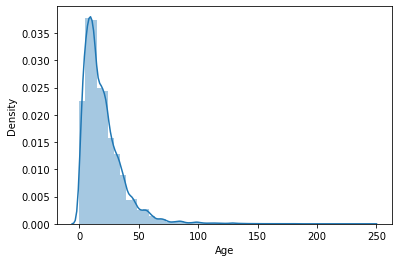

In [92]:
sns.distplot(InterF4['Age'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Labour', ylabel='Density'>

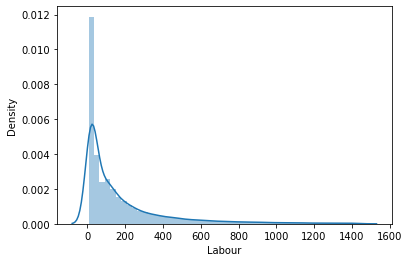

In [93]:
x_lb = np.quantile(InterF4['E16'], 0.025)
x_ub = np.quantile(InterF4['E16'], 0.975)

temp = InterF4[(InterF4['E16'] < x_ub) & (InterF4['E16'] > x_lb)]

temp = temp.rename(columns={'E16': 'Labour'})

sns.distplot(temp['Labour'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lnK', ylabel='Density'>

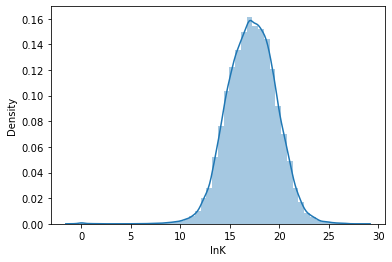

In [94]:
sns.distplot(InterF4['lnK'])

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logGVA', ylabel='Density'>

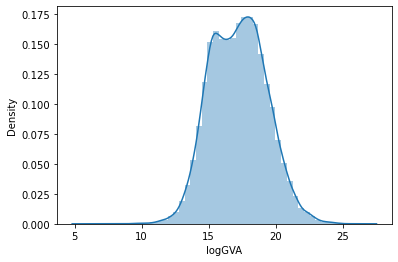

In [95]:
temp = InterF4.copy()
temp['logGVA'] = np.log(temp['GVA'])
sns.distplot(temp['logGVA'])